In [1]:
import numpy as np # for linear algebra  
import pandas as pd # for data processing, CSV file I/O (e.g. pd.read_csv)  
import seaborn as sns # for data visualization  
import matplotlib.pyplot as plt # to plot data visualization charts  
from collections import Counter  
import os  
  
# Modeling Libraries  
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score  
from sklearn.preprocessing import QuantileTransformer  
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier  
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split  
from sklearn.svm import SVC  

In [2]:
dataset = 'C:/Users/Maaz/Downloads/diabetes.csv'

data = pd.read_csv(dataset)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Replacing 0 values of Glucose  
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].median())  
  
# Filling 0 values of Blood Pressure  
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].median())   
  
# Replacing 0 values in BMI  
data['BMI'] = data['BMI'].replace(0, data['BMI'].mean())  
  
# Replacing the missing values of Insulin and SkinThickness  
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())  
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())  
data.head()  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1


In [7]:
# Reviewing the dataset statistics  
data.describe()  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'Correlation heatmap')

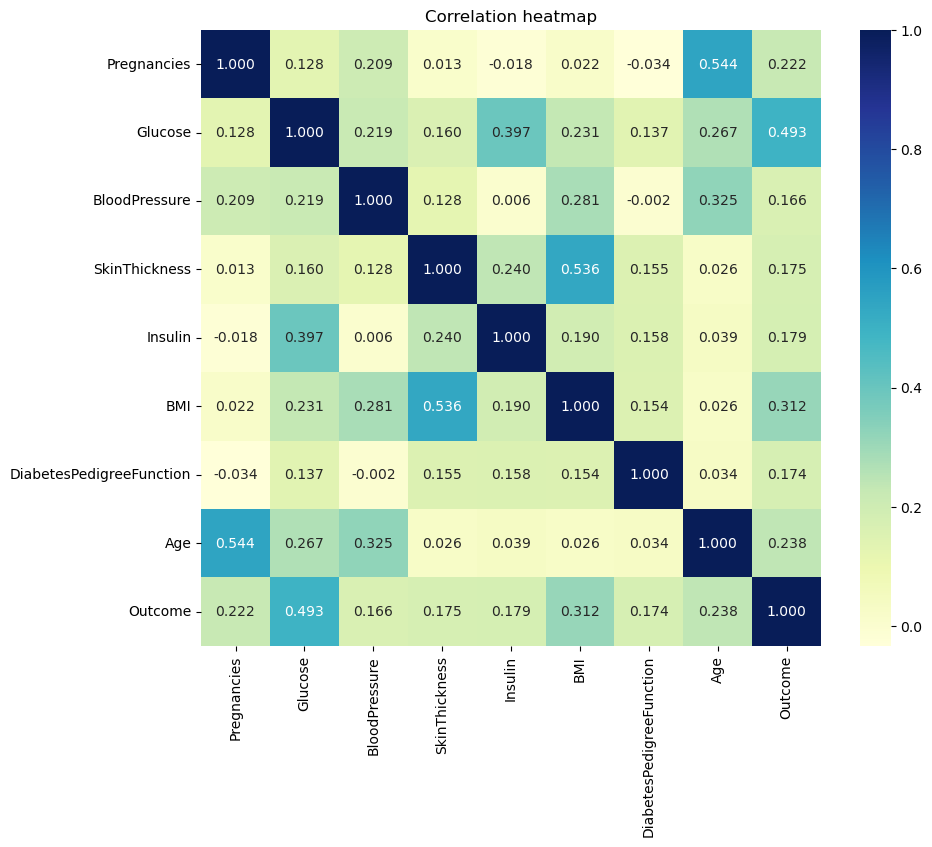

In [8]:
# Correlation plot of the independent variables  
  
plt.figure(figsize = (10, 8))  
sns.heatmap(data.corr(), annot = True, fmt = ".3f", cmap = "YlGnBu")  
plt.title("Correlation heatmap") 

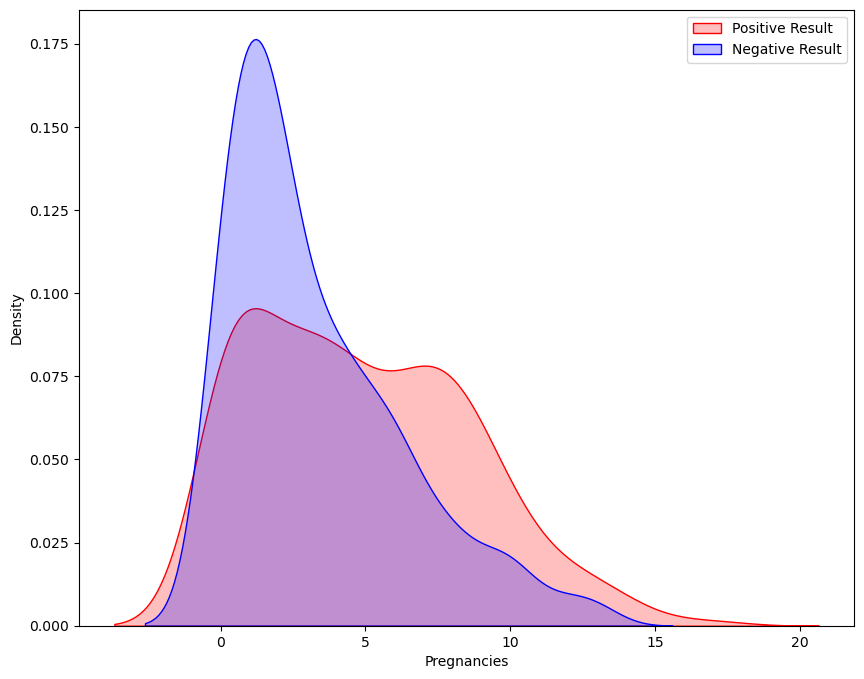

In [9]:
# Exploring Pregnancy and target variables together  
  
plt.figure(figsize = (10, 8))  
  
# Plotting density function graph of the pregnancies and the target variable  
kde = sns.kdeplot(data["Pregnancies"][data["Outcome"] == 1], color = "Red", fill = True)  
kde = sns.kdeplot(data["Pregnancies"][data["Outcome"] == 0], ax = kde, color = "Blue", fill= True)  
kde.set_xlabel("Pregnancies")  
kde.set_ylabel("Density")  
kde.legend(["Positive Result", "Negative Result"]) 

<Axes: xlabel='Outcome', ylabel='Glucose'>

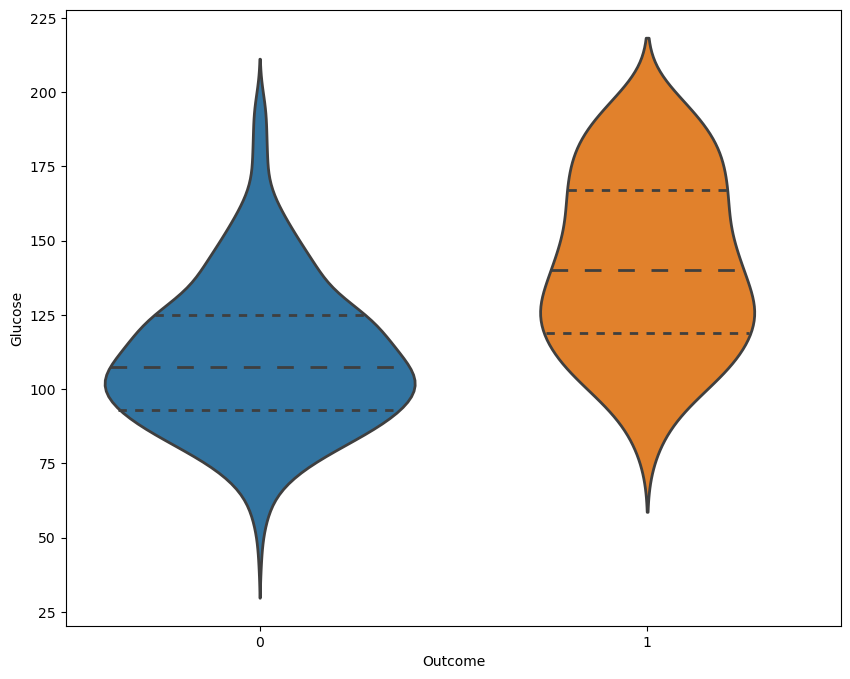

In [10]:
# Exploring the Glucose and the Target variables together  
plt.figure(figsize = (10, 8))  
sns.violinplot(data = data, x = "Outcome", y = "Glucose",split = True, inner = "quart", linewidth = 2)

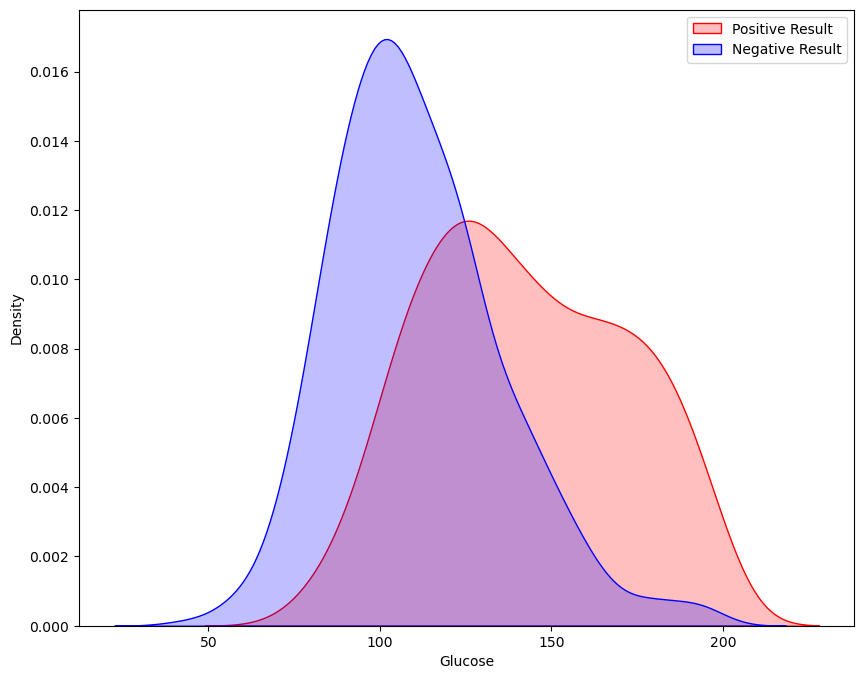

In [11]:
# Exploring the density function plot of the Glucose levels  
  
plt.figure(figsize = (10, 8))  
kde = sns.kdeplot(data["Glucose"][data["Outcome"] == 1], color = "Red", fill = True)  
kde = sns.kdeplot(data["Glucose"][data["Outcome"] == 0], ax = kde, color = "Blue", fill = True)  
kde.set_xlabel("Glucose")  
kde.set_ylabel("Density")  
kde.legend(["Positive Result","Negative Result"])

In [12]:
# Transforming the data into quartiles  
quartile  = QuantileTransformer()  
X = quartile.fit_transform(data)  
dataset = quartile.transform(X)  
dataset = pd.DataFrame(X)  
dataset.columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']  
# Showing the top 5 rows of the transformed dataset  
dataset.head()  

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2667: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.747718,0.810300,0.494133,0.801825,0.380052,0.591265,0.750978,0.889831,1.0
1,0.232725,0.091265,0.290091,0.644720,0.380052,0.213168,0.475880,0.558670,0.0
2,0.863755,0.956975,0.233377,0.308996,0.380052,0.077575,0.782269,0.585398,1.0
3,0.232725,0.124511,0.290091,0.505867,0.662973,0.284224,0.106258,0.000000,0.0
4,0.000000,0.721643,0.005215,0.801825,0.834420,0.926988,0.997392,0.606258,1.0


In [13]:
# Splitting the dependent and independent features  
X = data.drop(["Outcome"], axis = 1)  
Y = data["Outcome"]  
  
# Splitting the dataset into the training and testing dataset  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.40, random_state = 10)  
  
# Printing the size of the training and testing dataset  
print("The size of the training dataset: ", X_train.size)  
print("The size of the testing dataset: ", X_test.size) 

The size of the training dataset:  3680
The size of the testing dataset:  2464


In [14]:
# Python program to create a function to validate models  
  
def cv_model(models):  
      
    # Cross validating the model using the Kfold stratified cross-validation method  
    k_fold = StratifiedKFold(n_splits = 15)  
      
    r = []  
    for m in models :  
        r.append(cross_val_score(estimator = m, X = X_train, y = Y_train, scoring = "accuracy", cv = k_fold, n_jobs = 4))  
  
    cross_val_means = []  
    cross_val_std = []  
    for result in r:  
        cross_val_means.append(result.mean())  
        cross_val_std.append(result.std())  
  
    df_result = pd.DataFrame({  
        "CrossValMean": cross_val_means,  
        "CrossValStd": cross_val_std,  
        "Model List":[  
            "DecisionTreeClassifier",  
            "LogisticRegression",  
            "SVC",  
            "AdaBoostClassifier",  
            "GradientBoostingClassifier",  
            "RandomForestClassifier",  
            "KNeighborsClassifier"  
        ]  
    })  
  
    # Generating the graph of cross-validation scores  
    bar_plot = sns.barplot(x = cross_val_means, y = df_result["Model List"].values, data = df_result)  
    bar_plot.set_xlabel("Mean of Cross Validation Accuracy Scores")  
    bar_plot.set_title("Cross Validation Scores of Models")  
    return df_result  

,CrossValMean,CrossValStd,Model List
0,0.697921,0.067773,DecisionTreeClassifier
1,0.780358,0.085376,LogisticRegression
2,0.782437,0.069578,SVC
3,0.686882,0.050551,AdaBoostClassifier
4,0.762796,0.072912,GradientBoostingClassifier
5,0.760717,0.079104,RandomForestClassifier
6,0.739283,0.043985,KNeighborsClassifier


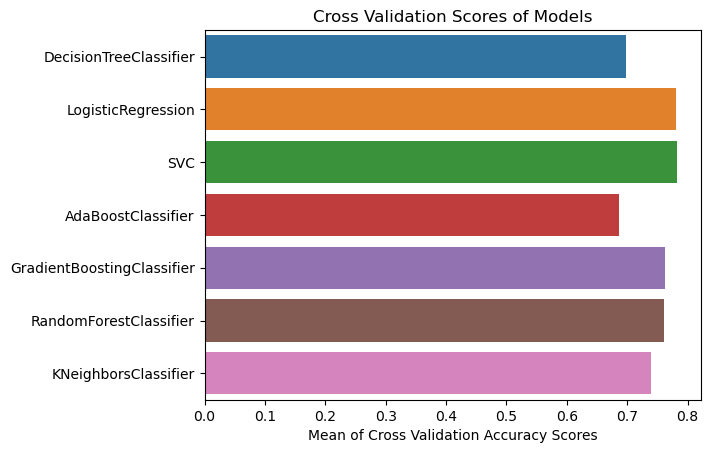

In [15]:
# Modeling the dataset using different machine learning algorithms  
state = 20  
models_list = [  
    DecisionTreeClassifier(random_state = state),  
    LogisticRegression(random_state = state, solver ='liblinear'),  
    SVC(random_state = state),  
    AdaBoostClassifier(DecisionTreeClassifier(random_state = state), random_state = state, learning_rate = 0.3),  
    GradientBoostingClassifier(random_state = state),  
    RandomForestClassifier(random_state = state),  
    KNeighborsClassifier()  
]  
cv_model(models_list)  

In [16]:
# Importing the required libraries  
from sklearn.metrics import classification_report  
from sklearn.model_selection import GridSearchCV  
  
# Defining a function to analyse the grid results  
def analyze_grid(grid):       
    # Printing the best parameter and accuracy score  
    print("Tuned hyperparameters: ", grid.best_params_)  
    print("Accuracy Score:", grid.best_score_)  
      
    mean_values = grid.cv_results_["mean_test_score"]  
    std_values = grid.cv_results_["std_test_score"]  
    for m, s, p in zip(mean_values, std_values, grid.cv_results_["params"]):  
      print(f"Mean: {m}, Std: {s} * 2, Params: {p}")  
      print("The classification Report:")  
    Y_true, Y_pred = Y_test, grid.predict(X_test)  
    print(classification_report(Y_true, Y_pred))  
    print()  

In [17]:
# Defining the Logistic Regression model and its parameters  
model = LogisticRegression(solver ='liblinear')  
solver_list = ['liblinear']  
penalty_type = ['l2']  
c_values = [200, 100, 10, 1.0, 0.01]  
  
# Defining the grid search  
grid_lr = dict(solver = solver_list, penalty = penalty_type, C = c_values)  
cross_val = StratifiedKFold(n_splits = 100, random_state = 10, shuffle = True)  
grid_search_cv = GridSearchCV(estimator = model, param_grid = grid_lr, cv = cross_val, scoring = 'accuracy', error_score = 0)  
lr_result = grid_search_cv.fit(X_train, Y_train)  
  
# Result of Hyper Parameters of Logistic Regression  
analyze_grid(lr_result)  

Tuned hyperparameters:  {'C': 200, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy Score: 0.7715000000000001
Mean: 0.7715000000000001, Std: 0.16556796187668676 * 2, Params: {'C': 200, 'penalty': 'l2', 'solver': 'liblinear'}
The classification Report:
Mean: 0.7715000000000001, Std: 0.16556796187668676 * 2, Params: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
The classification Report:
Mean: 0.7675, Std: 0.16961353129983467 * 2, Params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
The classification Report:
Mean: 0.7675, Std: 0.17224619008848932 * 2, Params: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
The classification Report:
Mean: 0.711, Std: 0.1888888562091475 * 2, Params: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
The classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       201
           1       0.70      0.52      0.60       107

    accuracy                           0.76       308


In [18]:
# Defining the SVC model and its parameters  
  
# Defining the grid search  
svc = SVC()  
parameters = [  
    {"kernel": ["rbf"], "gamma": [1e-4], "C": [200, 100, 10, 1.0, 0.01]}  
]  
  
# Performing the cross-validation with tuned parameters  
cross_val = StratifiedKFold(n_splits = 3, random_state = 10, shuffle = True)  
  
# Performing the grid search  
grid = GridSearchCV(estimator = svc, param_grid = parameters, cv = cross_val, scoring = 'accuracy')  
  
# SVC Hyperparameter tuning result  
result = grid.fit(X_train, Y_train)  
  
analyze_grid(result)  

Tuned hyperparameters:  {'C': 1.0, 'gamma': 0.0001, 'kernel': 'rbf'}
Accuracy Score: 0.7695158871629459
Mean: 0.745607333842628, Std: 0.019766615171568313 * 2, Params: {'C': 200, 'gamma': 0.0001, 'kernel': 'rbf'}
The classification Report:
Mean: 0.7521291344820756, Std: 0.02368565638376449 * 2, Params: {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
The classification Report:
Mean: 0.7542370483546955, Std: 0.046474062764375476 * 2, Params: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
The classification Report:
Mean: 0.7695158871629459, Std: 0.016045599935252022 * 2, Params: {'C': 1.0, 'gamma': 0.0001, 'kernel': 'rbf'}
The classification Report:
Mean: 0.650001414707297, Std: 0.002707677330225552 * 2, Params: {'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}
The classification Report:
              precision    recall  f1-score   support

           0       0.74      0.88      0.80       201
           1       0.64      0.42      0.51       107

    accuracy                           0.72       

In [19]:
# Defining the SVC model and its parameters  
  
# Defining the grid search  
rfc = RandomForestClassifier(random_state = 42)  
parameters = {   
    'n_estimators': [500],  
    'max_features': ['log2'],  
    'max_depth' : [4,5,6],  
    'criterion' :['entropy']  
}  
  
# Performing the cross-validation with tuned parameters  
cross_val = StratifiedKFold(n_splits = 3, random_state = 10, shuffle = True)  
  
# Performing the grid search  
grid = GridSearchCV(estimator = rfc, param_grid = parameters, cv = cross_val, scoring = 'accuracy')  
  
# SVC Hyperparameter Tuning Result  
result = grid.fit(X_train, Y_train)  
  
analyze_grid(result)  

Tuned hyperparameters:  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 500}
Accuracy Score: 0.7717369776193306
Mean: 0.7673938262173556, Std: 0.0027915297477680364 * 2, Params: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 500}
The classification Report:
Mean: 0.7717369776193306, Std: 0.005382324516419591 * 2, Params: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 500}
The classification Report:
Mean: 0.7652151769798828, Std: 0.02135846347536185 * 2, Params: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'log2', 'n_estimators': 500}
The classification Report:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       201
           1       0.66      0.50      0.57       107

    accuracy                           0.74       308
   macro avg       0.71      0.68      0.69       308
weighted avg       0.73      0.74      0.73      

In [20]:
# Making the predictions  
Y_pred = lr_result.predict(X_test)  
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       201
           1       0.70      0.52      0.60       107

    accuracy                           0.76       308
   macro avg       0.74      0.70      0.71       308
weighted avg       0.75      0.76      0.75       308



In [21]:
X_test['predictions'] = Y_pred  
print(X_test) 

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
568            4      154             72      29.000000  126.000000  31.3   
620            2      112             86      42.000000  160.000000  38.4   
456            1      135             54      20.536458   79.799479  26.7   
197            3      107             62      13.000000   48.000000  22.9   
714            3      102             74      20.536458   79.799479  29.5   
..           ...      ...            ...            ...         ...   ...   
70             2      100             66      20.000000   90.000000  32.9   
679            2      101             58      17.000000  265.000000  24.2   
375           12      140             82      43.000000  325.000000  39.2   
700            2      122             76      27.000000  200.000000  35.9   
505           10       75             82      20.536458   79.799479  33.3   

     DiabetesPedigreeFunction  Age  predictions  
568                     0